In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import cv2
import skimage
import os
import tifffile

In [3]:
wt_colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","#2FA0C1"])
tdp_untreated_colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","#6BCB46"])
tdp_dox_colormap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["black","#90278E"])

In [5]:
raw_image_path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk/batch6/WT/panelD/Untreated/rep2/PSD95/R11_w3confCy5_s396.tif"

with tifffile.TiffFile(raw_image_path) as tif:
    metadata = tif.pages[0].tags
    site_pixel_size_in_um = metadata.get('UIC1tag').value['XCalibration']
tile_pixel_size_in_um = site_pixel_size_in_um * 1.28


In [6]:
SAVE_PATH = "./manuscript/fig4/micrographs"

In [9]:
def plot_neuron_tile(path, tile_index, colormap, tile_pixel_size_in_um, filename, tile_scalebar_length_in_um=5, contrast_factor = 1, brightness_factor = 0.1, DAPI=False):
    site = np.load(path)

    # Adjust contrast and brightness
    brightness_adjusted = contrast_factor * (site[tile_index, :, :, int(DAPI)] - site[tile_index, :, :, 0].min()) + brightness_factor
    
    fig = plt.figure(figsize=(100/127,100/127), dpi=127) #100/dpi,100/dpi
    plt.imshow(brightness_adjusted, cmap=colormap,vmin=0, vmax=1)
    plt.axis('off')
    plt.margins = (0,0)
    tile_scalebar_length_in_pixels = tile_scalebar_length_in_um / tile_pixel_size_in_um
    plt.hlines(y=90, xmin=85-tile_scalebar_length_in_pixels, xmax=85, color='white', linewidth=2)
    # plt.text(y = 87.5, x = 85-tile_scalebar_length_in_pixels, 
    #          s=f"{tile_scalebar_length_in_um} \u03BCm", fontsize=4, color='white')
    plt.subplots_adjust(top = 1, bottom = 0, right = 1, left = 0, 
                hspace = 0, wspace = 0)
    plt.savefig(filename, dpi=127, bbox_inches='tight', pad_inches=0)

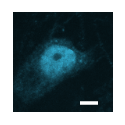

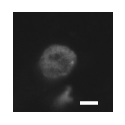

In [20]:
path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/deltaNLS/batch2_16bit_no_downsample/WT/Untreated/TDP43N/rep2_R11_w2confmCherry_s543_panelN_WT_processed.npy"
tile_index = 3
plot_neuron_tile(path, tile_index, wt_colormap, tile_pixel_size_in_um, filename=os.path.join(SAVE_PATH, "deltaNLS_WT_untreated_TDP43N.eps"), 
                 tile_scalebar_length_in_um=5, contrast_factor = 1.2, brightness_factor = 0.1, DAPI=False)
plot_neuron_tile(path, tile_index, 'gray', tile_pixel_size_in_um, filename=os.path.join(SAVE_PATH, "deltaNLS_WT_untreated_DAPI.eps"), 
                 tile_scalebar_length_in_um=5, contrast_factor = 2, brightness_factor = 0.1, DAPI=True)

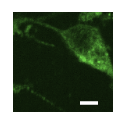

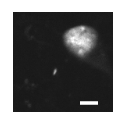

In [37]:
path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/deltaNLS/batch2_16bit_no_downsample/TDP43/Untreated/TDP43N/rep1_R11_w2confmCherry_s72_panelN_TDP43_processed.npy"
tile_index=0
plot_neuron_tile(path, tile_index, tdp_untreated_colormap, tile_pixel_size_in_um, filename=os.path.join(SAVE_PATH, "deltaNLS_TDP43_untreated_TDP43N.eps"), 
                 tile_scalebar_length_in_um=5, contrast_factor = 2, brightness_factor = 0.1, DAPI=False)
plot_neuron_tile(path, tile_index, 'gray', tile_pixel_size_in_um, filename=os.path.join(SAVE_PATH, "deltaNLS_TDP43_untreated_DAPI.eps"), 
                 tile_scalebar_length_in_um=5, contrast_factor = 1.5, brightness_factor = 0.1, DAPI=True)

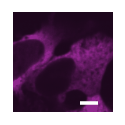

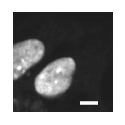

In [46]:
path = "/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/deltaNLS/batch2_16bit_no_downsample/TDP43/dox/TDP43N/rep2_R11_w2confmCherry_s337_panelN_TDP43_processed.npy"
tile_index=1
plot_neuron_tile(path, tile_index, tdp_dox_colormap, tile_pixel_size_in_um, filename=os.path.join(SAVE_PATH, "deltaNLS_TDP43_dox_TDP43N.eps"), 
                 tile_scalebar_length_in_um=5, contrast_factor = 2, brightness_factor = 0.2, DAPI=False)
plot_neuron_tile(path, tile_index, 'gray', tile_pixel_size_in_um, filename=os.path.join(SAVE_PATH, "deltaNLS_TDP43_dox_DAPI.eps"), 
                 tile_scalebar_length_in_um=5, contrast_factor = 1.3, brightness_factor = 0.1, DAPI=True)